## Implementation of  the KNN Algorithm from scratch and applying the same to the Breast Cancer Dataset. We will also look at a few methods to find the best value for K.

### Hyperparameters:
### k = Number of nearest neighbors (default = 3)
### p = 2 for Euclidean Distance and 1 for Manhatten Distance. (default = 2)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import random
from statistics import mean
import seaborn as sns
style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)

In [21]:
class KNN_classifier:
    #Constructor to initialize k and p----------------------------------------------------------------------------------
    def __init__(self, k = 3, p = 2):
        self.k = k
        self.p = p
        print('Nearest Neighbors k :', k)
        if self.p == 2:
            print("Distance Metric : Euclidean Distance" )
        if self.p == 1:
            print("Distance Metric : Manhattan Distance")
    
    #Fit---------------------------------------------------------------------------------------------------------------
    def fit(self, X, y):
        self.X = X
        self.y = y

    #Function to predict a query point for the given data--------------------------------------------------------------    
    def predict(self, query):
        self.distances=[]
        self.neighbors={}
        self.predict_label=None
        self.big_count=0
        
        self.query = np.array(query)

        if self.query.shape[0] == self.X.shape[1]:
            #Calculating distance between Query point and data points
            for input_, label in zip(self.X, self.y):
                distance_value = np.linalg.norm( input_ - self.query, self.p )
                self.distances.append((distance_value, label))
            #Sorting the distances in ascending order
            self.distances = sorted(self.distances)
            #print(self.distances)
            
            #Counting the number of labels for the first k nearest distances
            for distance_value, label in self.distances[:self.k]:
                self.neighbors[label] = self.neighbors.get(label, 0) + 1
            
            #Assigning the label with the biggest count
            for label, count in self.neighbors.items():
                if self.big_count == 0 or count > self.big_count:
                    self.big_count = count
                    self.predict_label = int(label)
            
            return self.predict_label
        
        else:
            print(f'Expected input size is {self.X.shape[1]}')
    
    #Function to calculate the accuracy score for a given set of points--------------------------------------------------
    def score(self, X_test, y_test):
        correctly_predicted = 0
        for test_query, test_label in zip(X_test, y_test):
            if self.predict(test_query) == test_label:
                #print(self.predict(test_query),test_label)
                correctly_predicted+=1
        return correctly_predicted / y_test.shape[0]
            
    #Function to Plot 2D output for query point--------------------------------------------------------------------------------        
    def plot(self,):
        if self.X.shape[1] == 2:
            plt.scatter(self.X[:,0], self.X[:,1], c = self.y[:], edgecolors='k', s =100)
            plt.scatter(self.query[0], self.query[1], edgecolors='k', s =100, label = 'Query point')
            plt.legend()
            plt.show()     

## Let's use it on a Sample Dataset

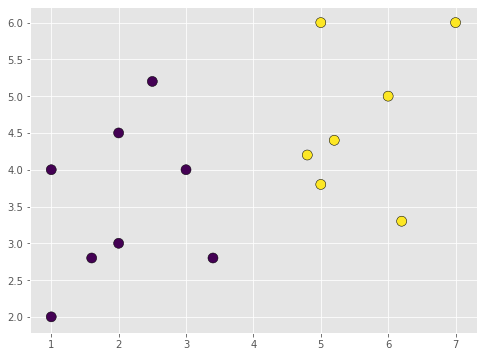

In [22]:
data =np.array([[1,2, 0],
       [2,3, 0],
       [1,4, 0],
       [3,4, 0],
       [2,4.5, 0],
       [1.6,2.8, 0],
       [2.5,5.2, 0],
       [3.4,2.8, 0],
       [6,5, 1],
       [5,6, 1],
       [7,6, 1],
       [4.8,4.2, 1],
       [5.2,4.4, 1],
       [6.2,3.3, 1],
       [5,3.8, 1]])

X = data[:,:-1]
y = data[:,-1]

plt.scatter(X[:,0], X[:,1] , c = y[:],edgecolors='k', s =100)

## Instantiating the classifier and predicting the label for a query point

In [23]:
clf = KNN_classifier(k = 10)

Nearest Neighbors k : 10
Distance Metric : Euclidean Distance


In [24]:
clf.fit(X, y)
clf.predict([4.8, 3])

1

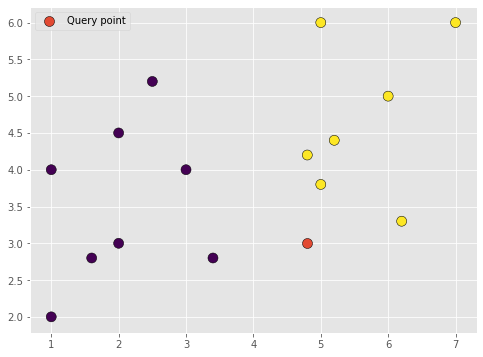

In [25]:
clf.plot()

## Let's now use the Breast Cancer Dataset.

In [26]:
cancer=pd.read_csv('breast-cancer-wisconsin.data')
cancer.replace('?',-9999,inplace=True)
cancer.drop('id',1,inplace=True)
cancer = cancer.astype(float)
cancer

,clump_thickness,unif_cell_size,unif_shape,marg_adhesion,single_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [27]:
X=np.array(cancer.drop('class',1))
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [28]:
# class labels are 2 for 'Malignant' and 4 for 'Benign'
y=np.array(cancer['class'])

## Using train_test_split to measure accuracy of the model

In [29]:
# random.shuffle(data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

In [30]:
# k = 5, p = 2 ; euclidean distance
mod_euclidean = KNN_classifier(k = 5, p = 2)
mod_manhattan = KNN_classifier(k = 5, p = 1)

Nearest Neighbors k : 5
Distance Metric : Euclidean Distance
Nearest Neighbors k : 5
Distance Metric : Manhattan Distance


In [31]:
mod_euclidean.fit(X_train, y_train)
mod_manhattan.fit(X_train, y_train)

In [32]:
print('Model accuracy using Euclidean Distance:',mod_euclidean.score(X_test, y_test))
print('Model accuracy using Manhattan Distance:', mod_manhattan.score(X_test, y_test))

Model accuracy using Euclidean Distance: 0.9785714285714285
Model accuracy using Manhattan Distance: 0.9642857142857143


## Verifying the above model with scikit_learn's KNN classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNN_euclidean = KNeighborsClassifier(n_neighbors = 5, p = 2)
KNN_manhattan = KNeighborsClassifier(n_neighbors = 5, p = 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

In [36]:
KNN_euclidean.fit(X_train, y_train)
KNN_manhattan.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

## Not Bad!!

In [37]:
print('Model accuracy using Euclidean Distance:',KNN_euclidean.score(X_test, y_test))
print('Model accuracy using Manhattan Distance:', KNN_manhattan.score(X_test, y_test))

Model accuracy using Euclidean Distance: 0.9785714285714285
Model accuracy using Manhattan Distance: 0.9714285714285714


# Methods to find optimal value for k

## Selecting k as sqrt(N) where N is the size of the dataset

In [38]:
N = len(X_train)
N

559

In [39]:
optimal_k = int(np.floor(np.sqrt(N)))
optimal_k

23

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN_sqrt= KNeighborsClassifier(n_neighbors = 23, p = 2)
KNN_sqrt.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [41]:
print(f'Model accuracy using k = {optimal_k}:',KNN_sqrt.score(X_test, y_test))

Model accuracy using k = 23: 0.9642857142857143


## Applying K-Fold Cross Validation for different n_neighbor values

In [42]:
from sklearn.model_selection import cross_val_score
KNN_cv= KNeighborsClassifier(n_neighbors = 5, p = 2)
scores = cross_val_score(KNN_cv, X, y, cv = 20)
scores.mean()

0.9715429505135387

In [65]:
# function to plot the CV accuracy for 'k_value' neighbors and  returns the best  n_neighbor value for the model 
def CV_k_accuracy(k_value, cv_value, plot = False):
    avg_scores=[]
    for n in range(1,k_value+1):
        KNN_cv= KNeighborsClassifier(n_neighbors = n, p = 2)
        score = cross_val_score(KNN_cv, X, y, cv = cv_value)
        avg_scores.append(score.mean())
    if plot == True:
        plt.scatter(list(range(1,k_value+1)), avg_scores)
        plt.plot(list(range(1,k_value+1)), avg_scores)
        plt.xlabel('n_neighbors value')
        plt.ylabel(f'{cv_value} fold CV Accuracy')
        plt.show()
    return np.argmax(np.array(avg_scores)) + 1        

## We can conclude that we get the highest accuracy at n_neighbors = 5

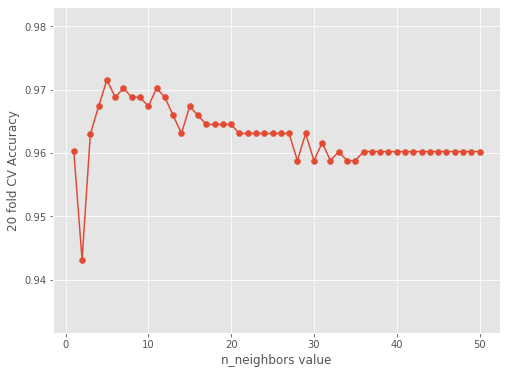

5

In [67]:
# finding the best n_neighbor value for the model for cv = 20
CV_k_accuracy(50, 20, True)

In [61]:
KNN_cv= KNeighborsClassifier(n_neighbors = CV_k_accuracy(50, 20, False), p = 2)
scores = cross_val_score(KNN_cv, X, y, cv = 20)
scores.mean()

0.9715429505135387

## After comparing both the methods the best n_neighbors value is found to be 5 after using KFCV

In [ ]:
print(f'Model accuracy using sqrt(N) = {optimal_k}:',KNN_sqrt.score(X_test, y_test))
print(f'Model accuracy using K_Fold_Cross_validation at n_neighbors = {CV_k_accuracy(50, 20, False)}: {scores.mean()}')